<a href="https://colab.research.google.com/github/tara618/symmetrical-octo-palm-tree/blob/main/ML_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math

data=[["<=30","high","no","fair","no"],
      ["<=30","high","no","excellent","no"],
       ["31...40","high","no","fair","yes"],
       [">=40","medium","no","fair","yes"],
      [">=40","low","yes","fair","yes"],
      [">=40","low","yes","excellent","no"],
      ["31...40","low","yes","excellent","yes"],
      ["<=30","medium","no","fair","no"],
       ["<=30","low","yes","fair","yes"],
       [">40","medium","yes","fair","yes"],
      ["<=30","medium","yes","excellent","yes"],
      ["31...40","medium","no","excellent","yes"],
       ["31...40","high","yes","fair","yes"],
      [">40","medium","no","excellent","no"] ]
column=["age","income","student","credit_rating","buys_computer"]
df=pd.DataFrame(data,columns=column)
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>=40,medium,no,fair,yes
4,>=40,low,yes,fair,yes
5,>=40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [ ]:
def entropy(data):
    total_instances = len(data)
    if total_instances == 0:
        return 0

    num_yes = len(data[data['buys_computer'] == 'yes'])
    num_no = len(data[data['buys_computer'] == 'no'])

    p_yes = num_yes / total_instances
    p_no = num_no / total_instances

    if p_yes == 0 or p_no == 0:
        return 0

    entropy = -p_yes * math.log2(p_yes) - p_no * math.log2(p_no)
    return entropy

def information_gain(data, attribute):
    unique_values = data[attribute].unique()
    total_entropy = entropy(data)

    weighted_entropy = 0
    for value in unique_values:
        subset = data[data[attribute] == value]
        subset_entropy = entropy(subset)
        weight = len(subset) / len(data)
        weighted_entropy += weight * subset_entropy

    information_gain = total_entropy - weighted_entropy
    return information_gain

attributes = ['age', 'income', 'student', 'credit_rating']
information_gains = {}

for attribute in attributes:
    information_gains[attribute] = information_gain(df, attribute)

root_attribute = max(information_gains, key=information_gains.get)
root_ig = information_gains[root_attribute]

print("Information Gains:")
for attribute, ig in information_gains.items():
    print(f"{attribute}: {ig}")

print(f"\nThe first feature for constructing the decision tree is '{root_attribute}' with Information Gain {root_ig:.3f}")


Information Gains:
age: 0.25388306763943036
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949

The first feature for constructing the decision tree is 'age' with Information Gain 0.254


In [ ]:
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier, plot_tree
le = sk.preprocessing.LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)
tree_depth = clf.get_depth()
print(f"Depth of the Decision Tree: {tree_depth}")

Depth of the Decision Tree: 4


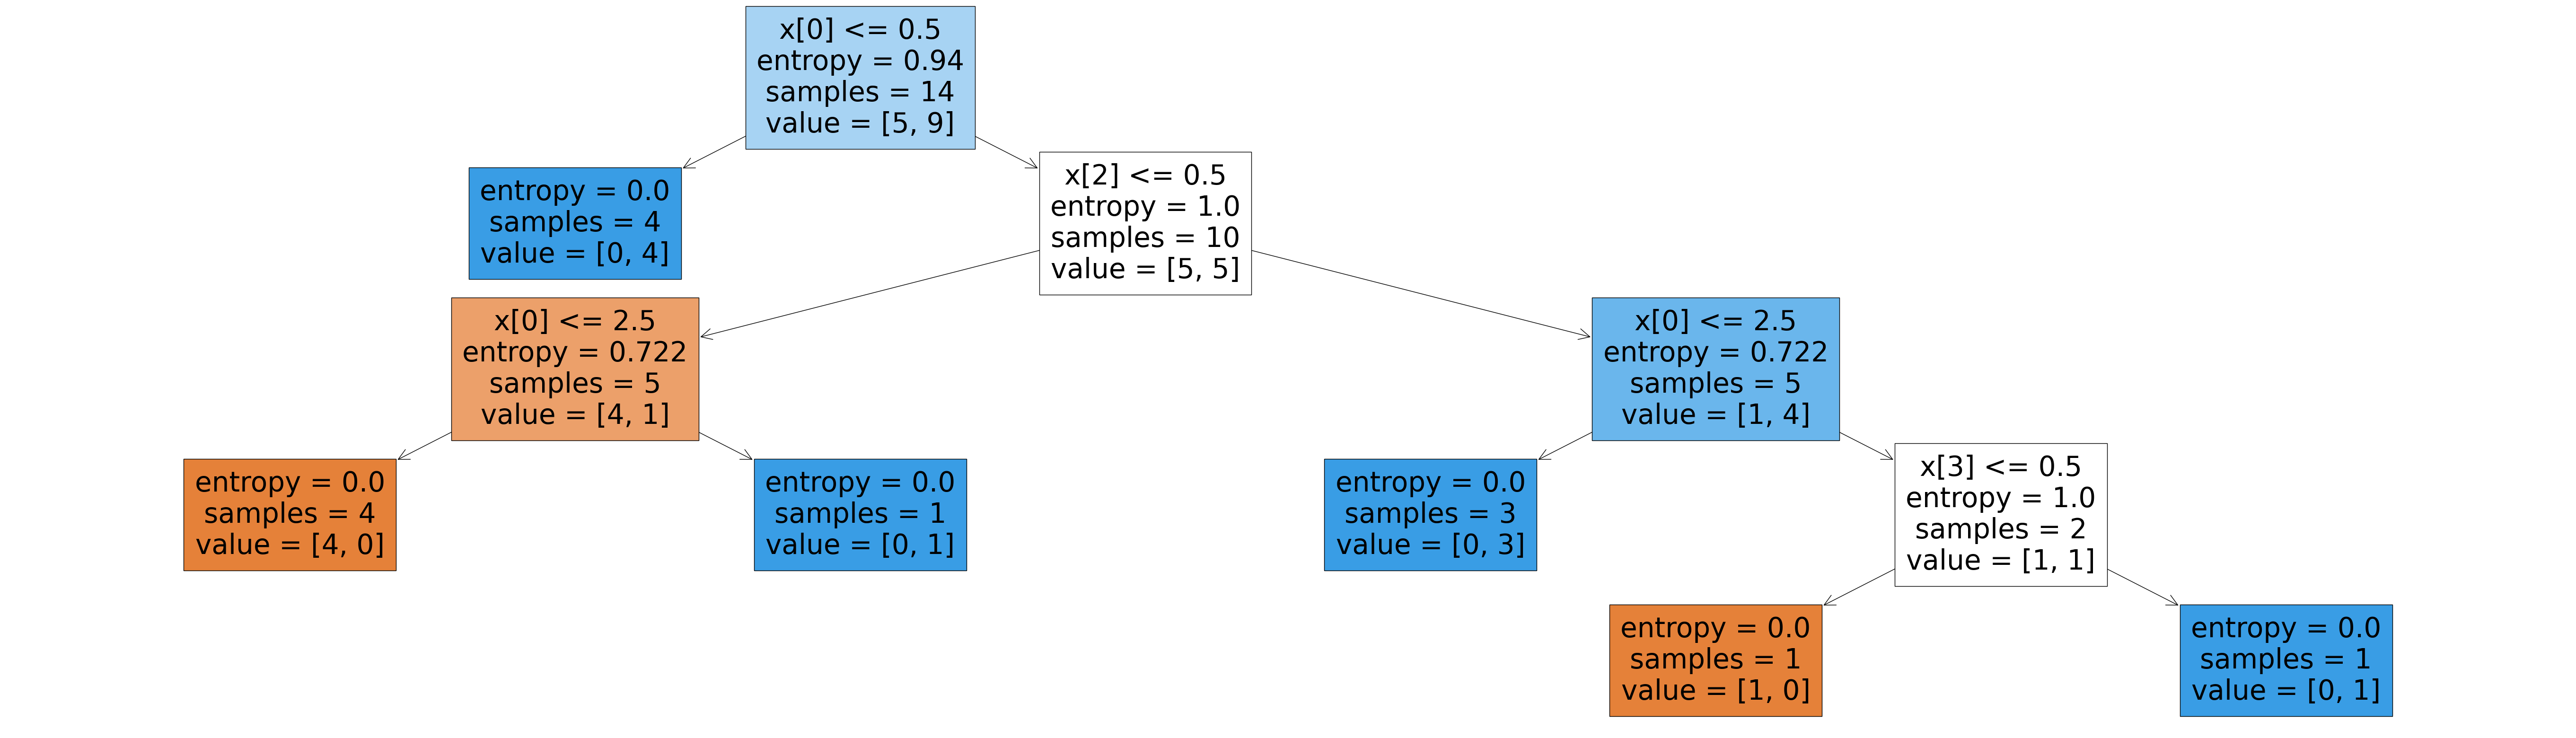

In [ ]:
import matplotlib.pyplot as plt

from sklearn import tree
plt.figure(figsize=(70, 20))

plot_tree(clf, filled=True)
plt.show()

In [ ]:
df2 = pd.read_csv('./water_potability.csv')
df2.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


Training Set Accuracy: 1.0
Test Set Accuracy: 0.6277915632754343


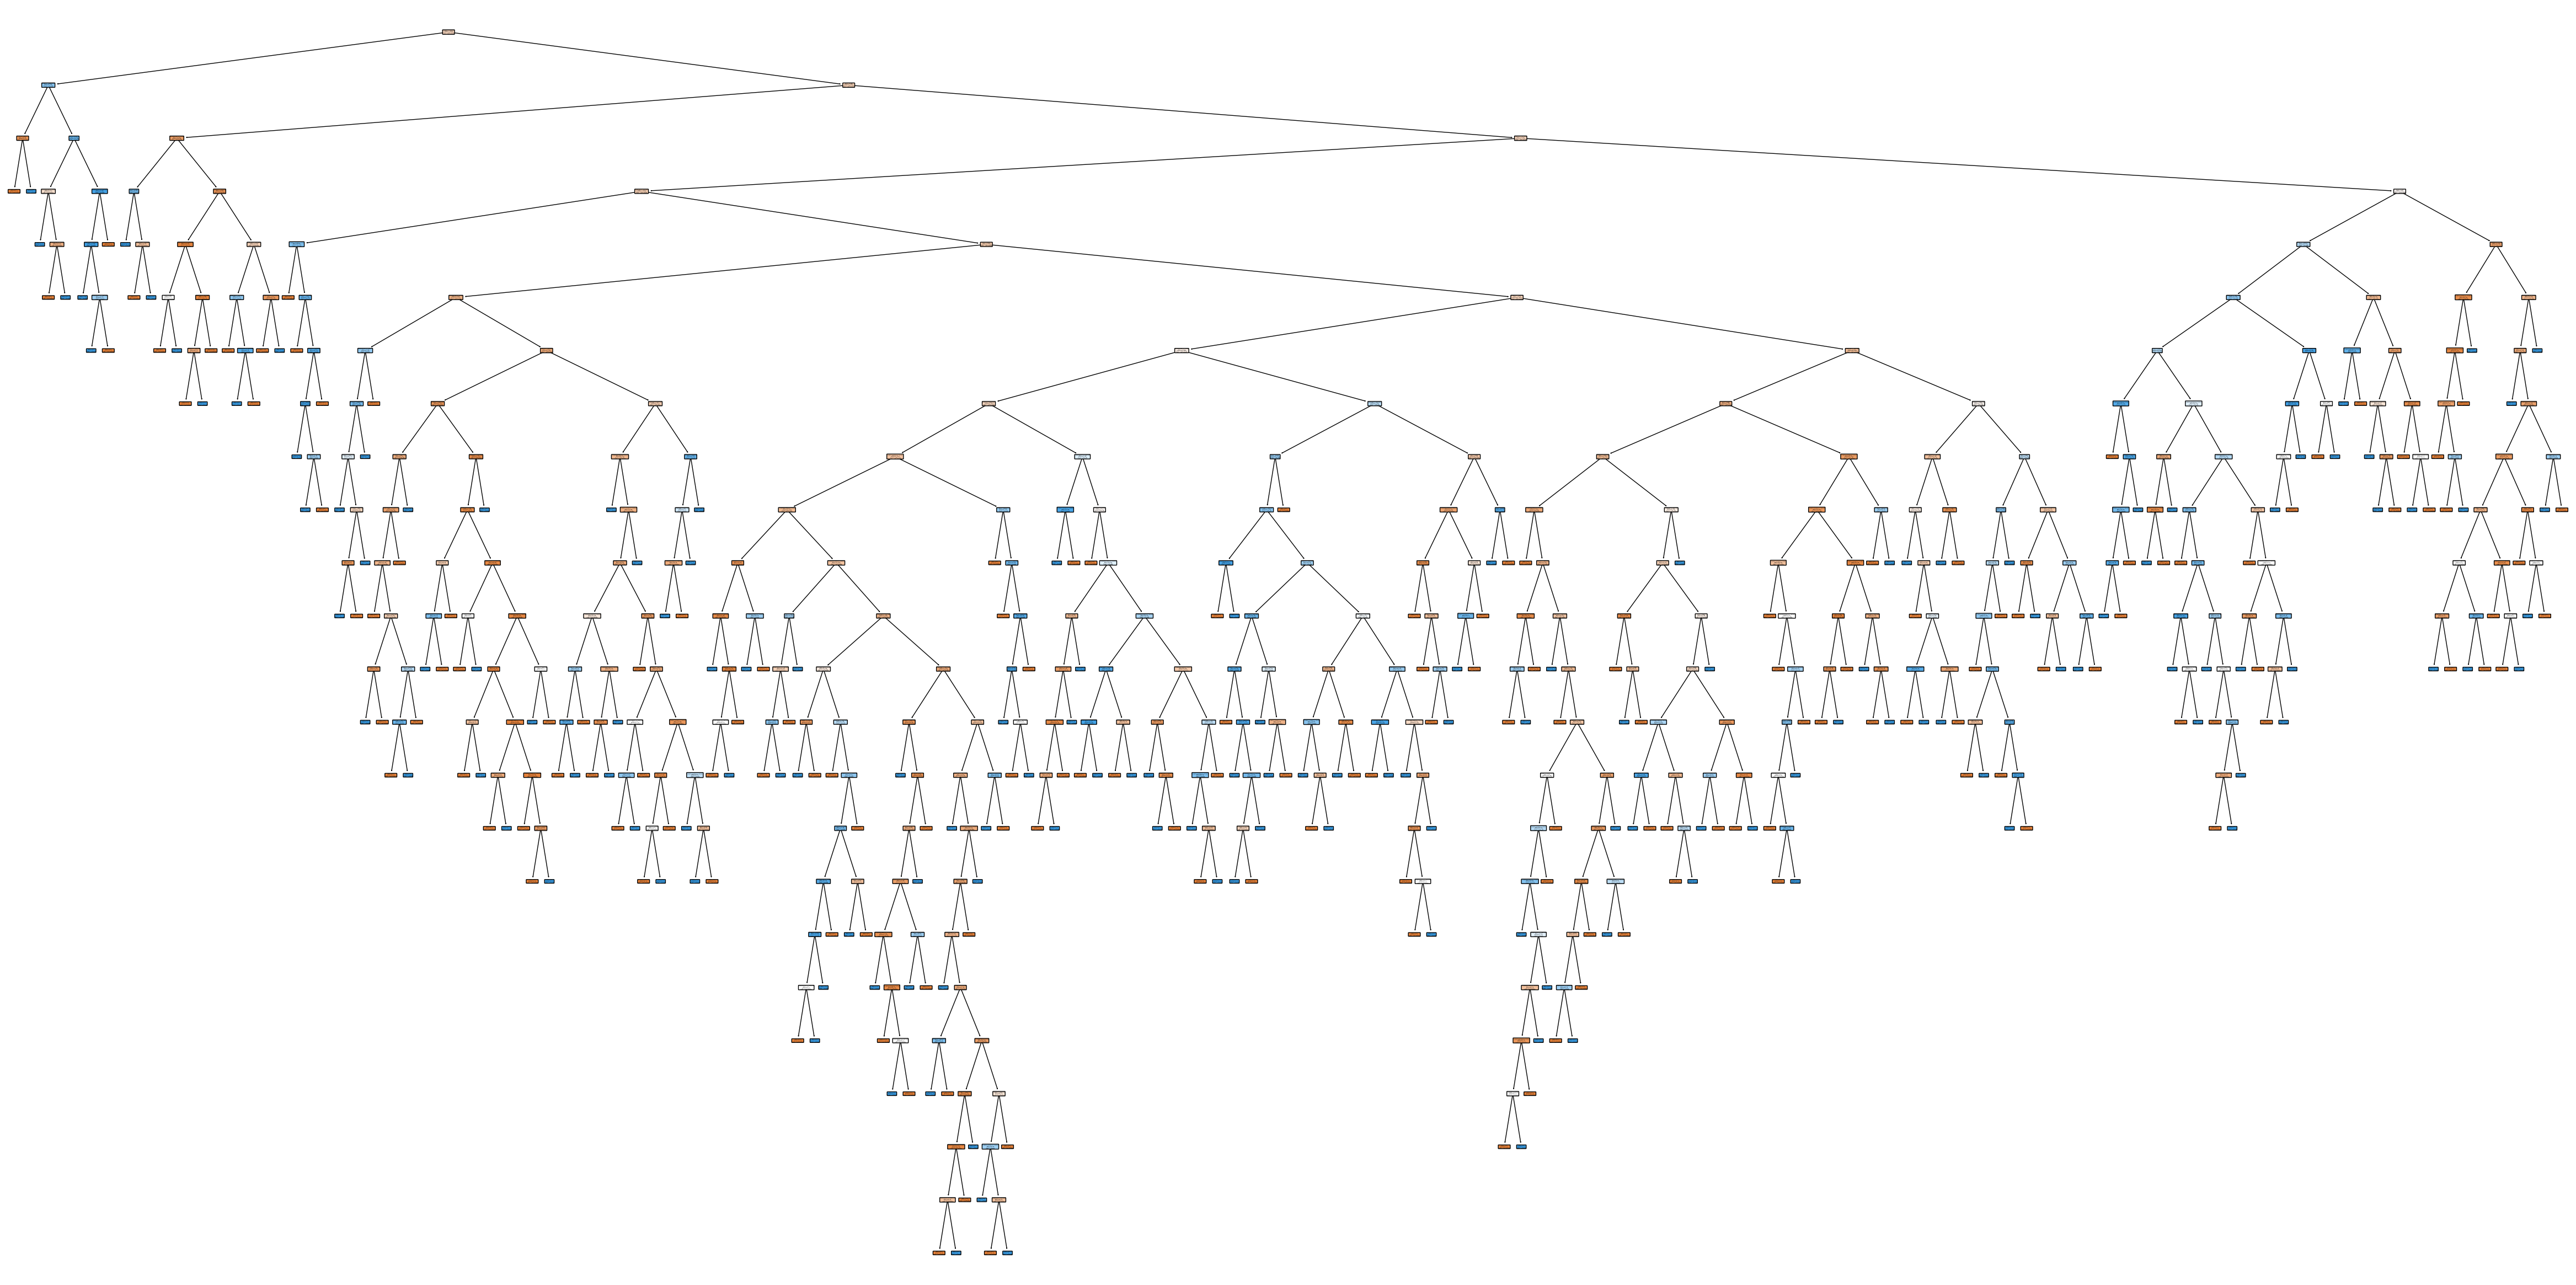

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

df2.dropna(inplace=True)
X = df2.drop(columns=['Potability'])
y = df2['Potability']
TrainX, TestX, Trainy, Testy = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state = 42)
model.fit(TrainX, Trainy)
train_accuracy = model.score(TrainX, Trainy)
print("Training Set Accuracy:", train_accuracy)
test_accuracy = model.score(TestX, Testy)
print("Test Set Accuracy:", test_accuracy)
plt.figure(figsize=(60, 30))
plot_tree(model, feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True)
plt.show()

Training Set Accuracy: 0.6822139303482587
Test Set Accuracy: 0.6401985111662531


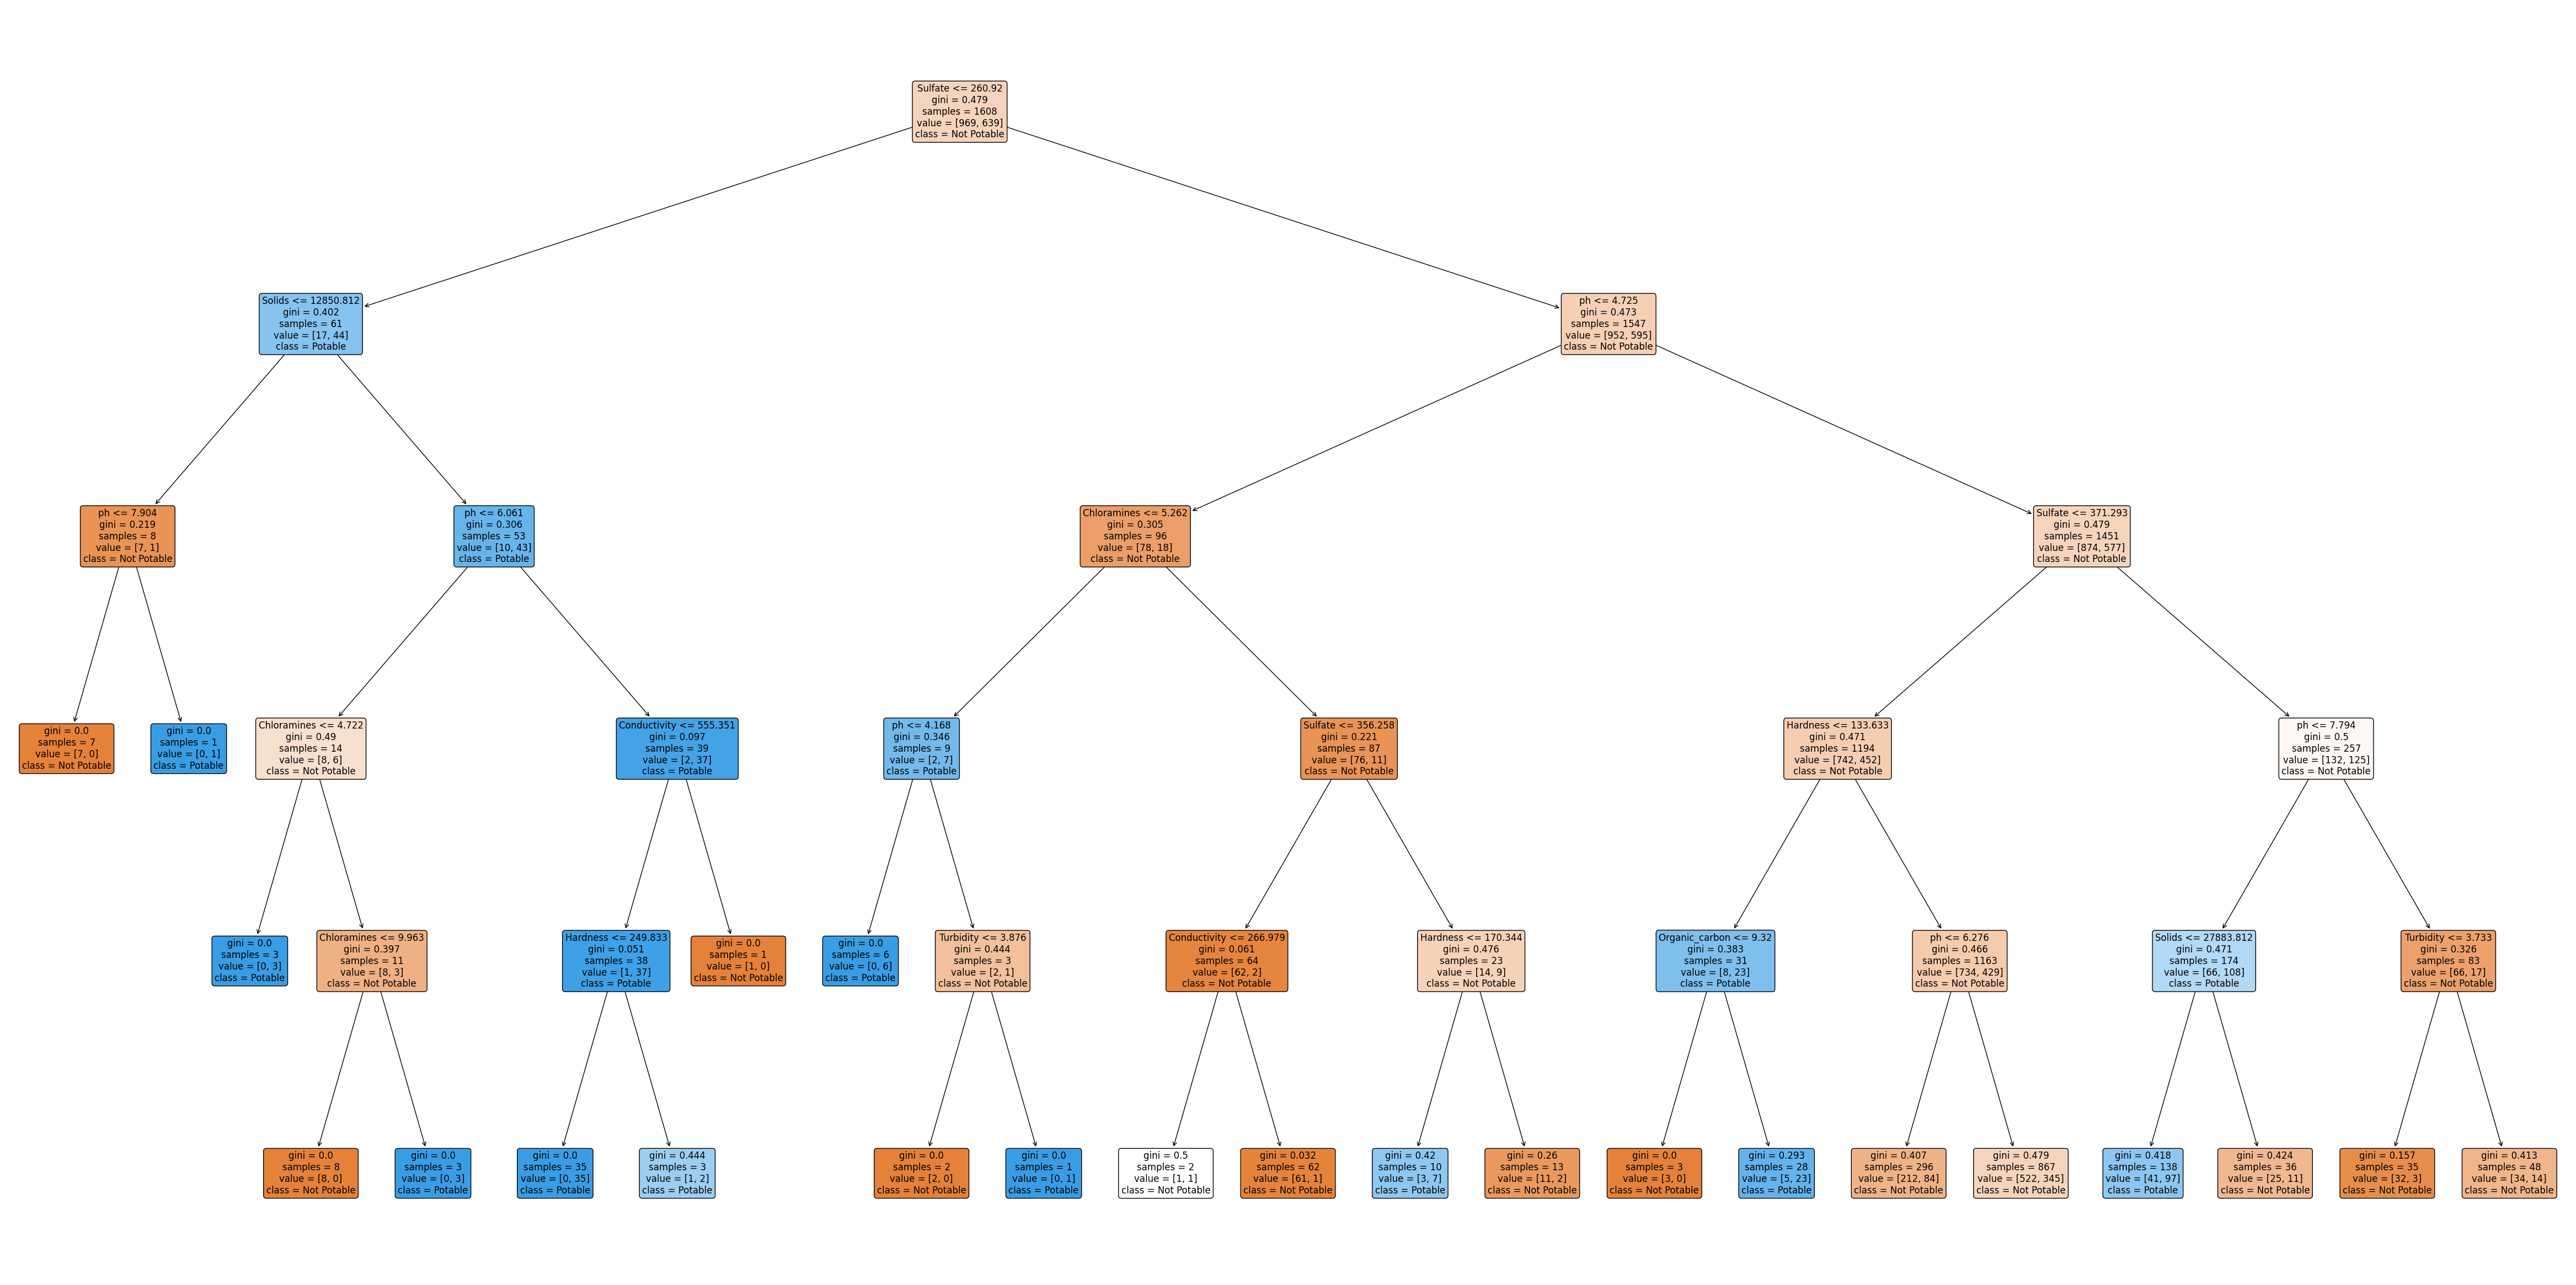

In [ ]:
model1 = DecisionTreeClassifier(max_depth=5, random_state = 42)
model1.fit(TrainX, Trainy)
train_accuracy = model1.score(TrainX, Trainy)
print("Training Set Accuracy:", train_accuracy)
test_accuracy = model1.score(TestX, Testy)
print("Test Set Accuracy:", test_accuracy)
plt.figure(figsize=(60, 30))
plot_tree(model1, feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True)
plt.show()

Training Set Accuracy (Entropy Criterion): 1.0
Test Set Accuracy (Entropy Criterion): 0.6029776674937966
Diff. between the default criterion and entropy criterion accuracy of training model : -0.3177860696517413
Diff. between the default criterion and entropy criterion accuracy of testing model : 0.012406947890818865


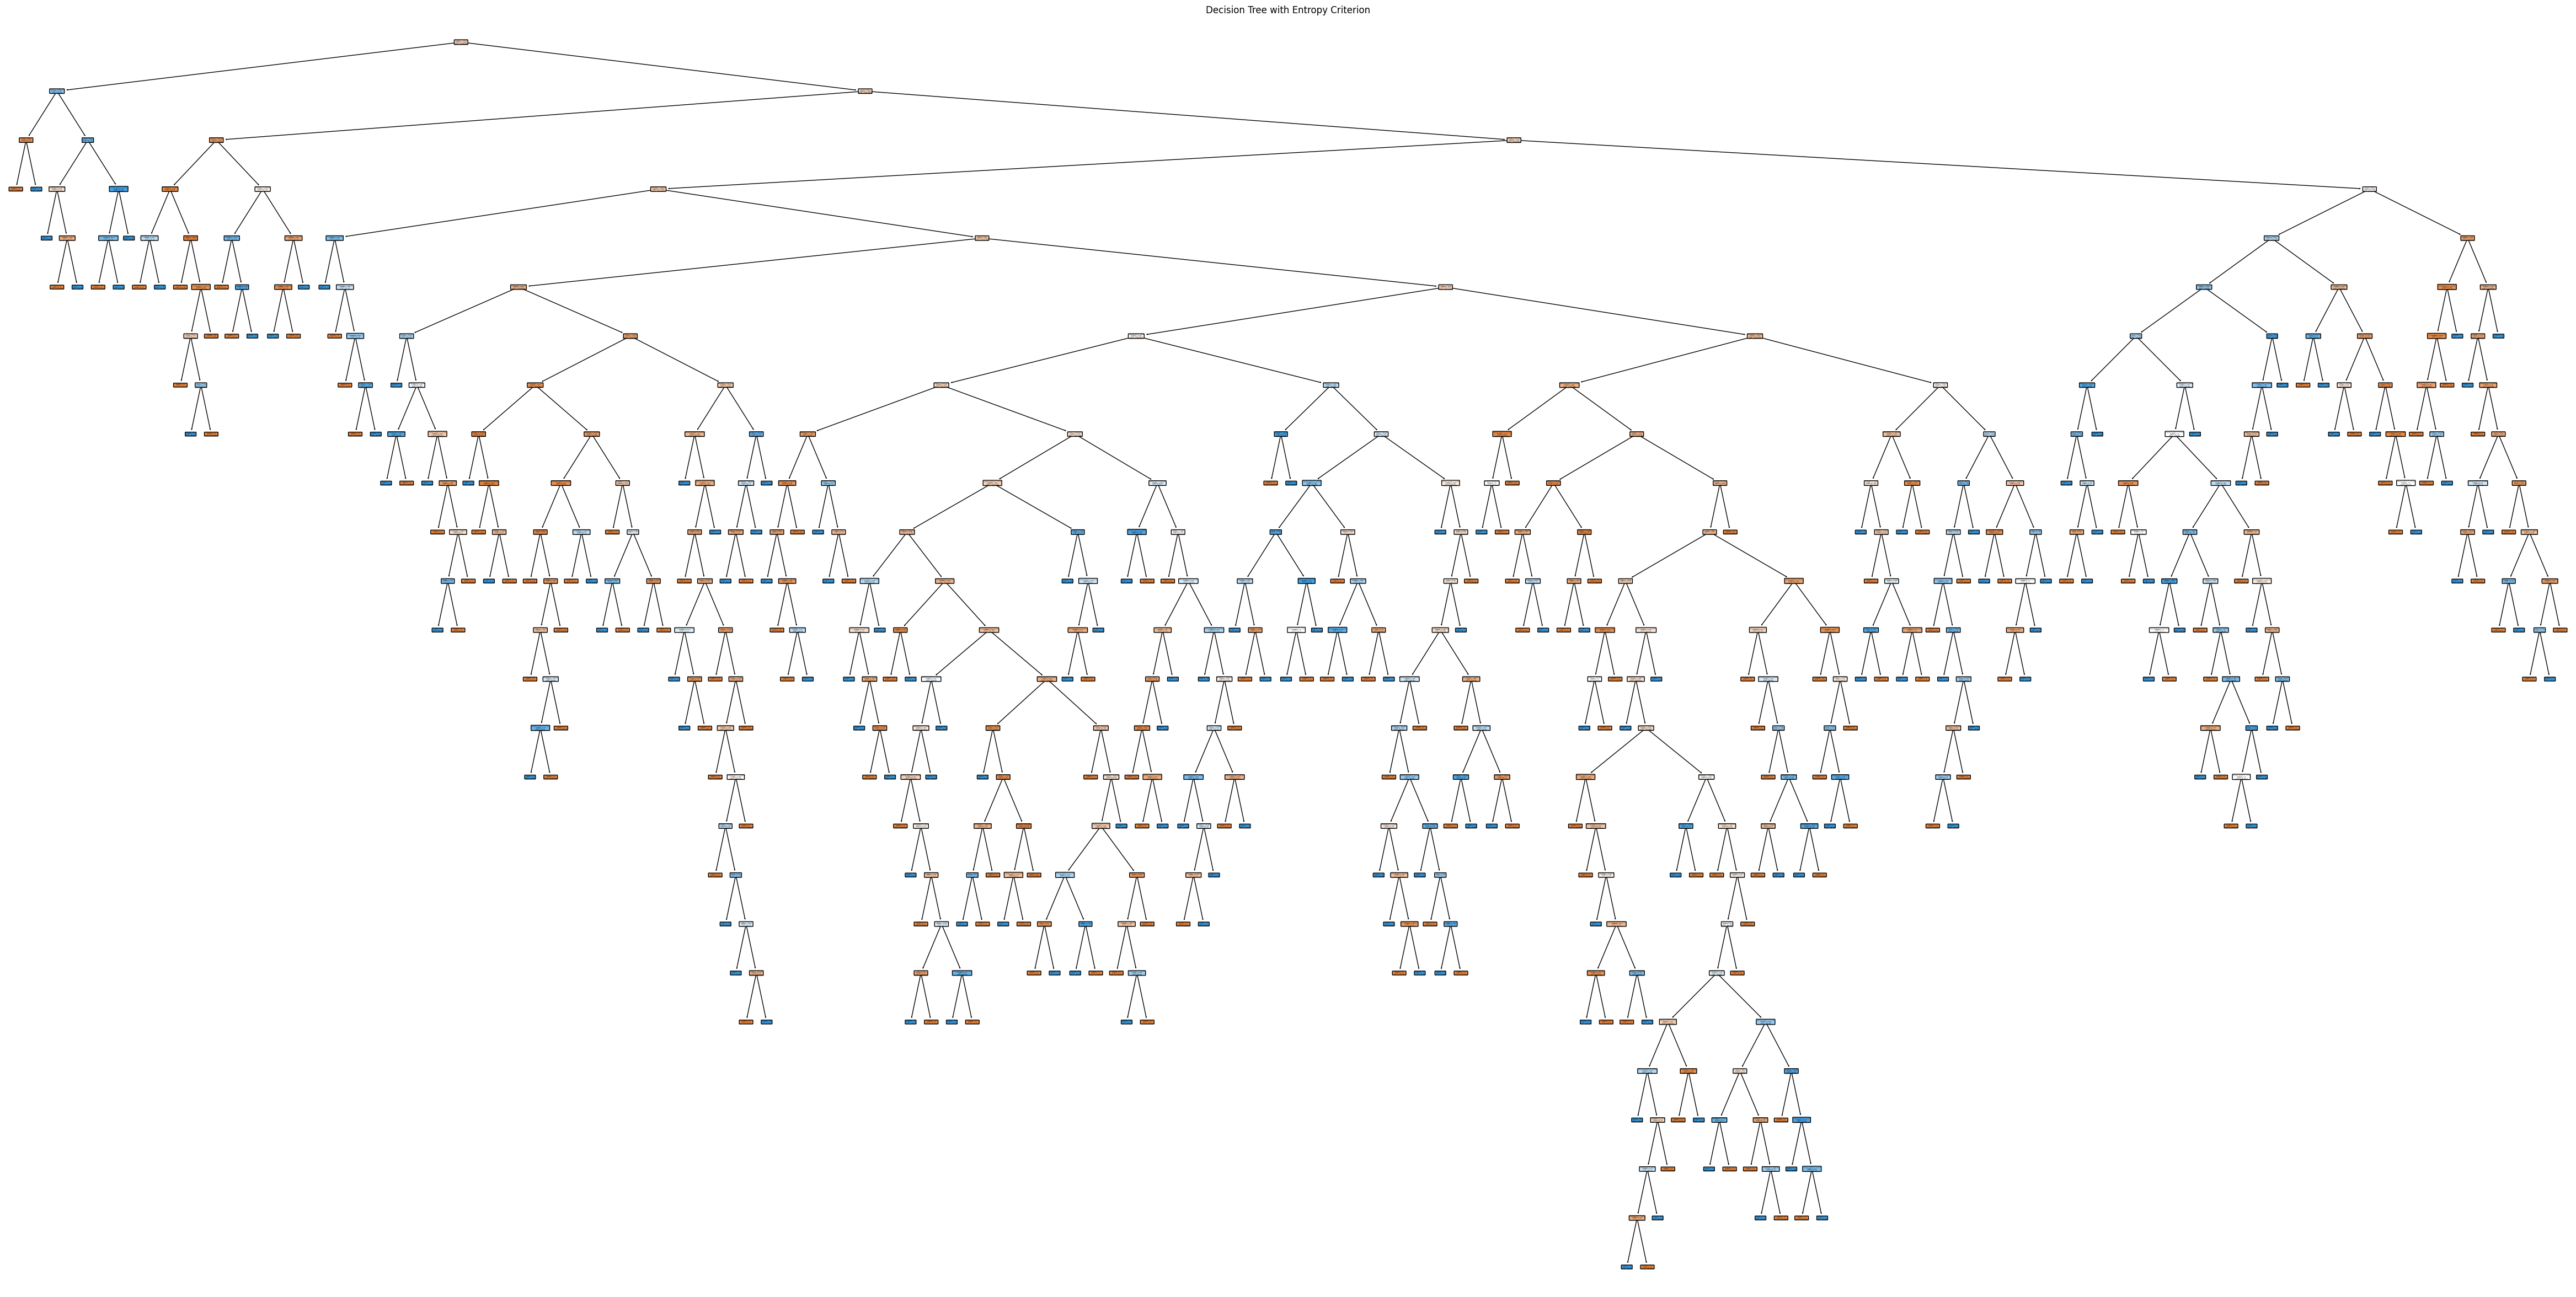

In [ ]:
model_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
model_entropy.fit(TrainX, Trainy)
train_accuracy_entropy = model_entropy.score(TrainX, Trainy)
print("Training Set Accuracy (Entropy Criterion):", train_accuracy_entropy)
test_accuracy_entropy = model_entropy.score(TestX, Testy)
print("Test Set Accuracy (Entropy Criterion):", test_accuracy_entropy)
print(f"Diff. between the default criterion and entropy criterion accuracy of training model : {(model1.score(TrainX,Trainy))-(model.score(TrainX,Trainy))}")
print(f"Diff. between the default criterion and entropy criterion accuracy of testing model : {(model1.score(TestX,Testy))-(model.score(TestX,Testy))}")
plt.figure(figsize=(60, 30))
plot_tree(model_entropy, feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True)
plt.title("Decision Tree with Entropy Criterion")
plt.show()

In [ ]:
decision_predictions = model1.predict(TestX)
print("Decision Tree Model Accuracy:", train_accuracy)
print("Classification Report:\n", classification_report(Testy, decision_predictions))
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(TrainX, Trainy)
random_forest_predictions = random_forest_model.predict(TestX)
random_forest_accuracy = accuracy_score(Testy, random_forest_predictions)
random_forest_report = classification_report(Testy, random_forest_predictions)
print("\nRandom Forest Model Accuracy:", random_forest_accuracy)
print("Random Forest Model Classification Report:\n",Testy, random_forest_report)

Decision Tree Model Accuracy: 0.6822139303482587
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.91      0.74       231
           1       0.70      0.27      0.39       172

    accuracy                           0.64       403
   macro avg       0.66      0.59      0.57       403
weighted avg       0.66      0.64      0.59       403


Random Forest Model Accuracy: 0.652605459057072
Random Forest Model Classification Report:
 2144    0
854     0
637     0
2299    0
706     1
       ..
1182    1
2398    1
1113    1
2883    0
2650    0
Name: Potability, Length: 403, dtype: int64               precision    recall  f1-score   support

           0       0.65      0.84      0.73       231
           1       0.65      0.40      0.50       172

    accuracy                           0.65       403
   macro avg       0.65      0.62      0.62       403
weighted avg       0.65      0.65      0.63       403

